In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-stock-price2004-2023/google_stock_price.csv


In [2]:
df=pd.read_csv('/kaggle/input/google-stock-price2004-2023/google_stock_price.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...
4837,2023-11-06,130.220001,131.559998,129.929993,131.449997,131.449997,15360400
4838,2023-11-07,131.979996,133.279999,131.139999,132.399994,132.399994,19223800
4839,2023-11-08,132.360001,133.539993,132.160004,133.259995,133.259995,15093600
4840,2023-11-09,133.360001,133.960007,131.509995,131.690002,131.690002,17976500


In [3]:
df.loc[:,'Date']=pd.to_datetime(df.loc[:,'Date'],format='%Y-%m-%d')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19 00:00:00,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20 00:00:00,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23 00:00:00,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24 00:00:00,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25 00:00:00,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...
4837,2023-11-06 00:00:00,130.220001,131.559998,129.929993,131.449997,131.449997,15360400
4838,2023-11-07 00:00:00,131.979996,133.279999,131.139999,132.399994,132.399994,19223800
4839,2023-11-08 00:00:00,132.360001,133.539993,132.160004,133.259995,133.259995,15093600
4840,2023-11-09 00:00:00,133.360001,133.960007,131.509995,131.690002,131.690002,17976500


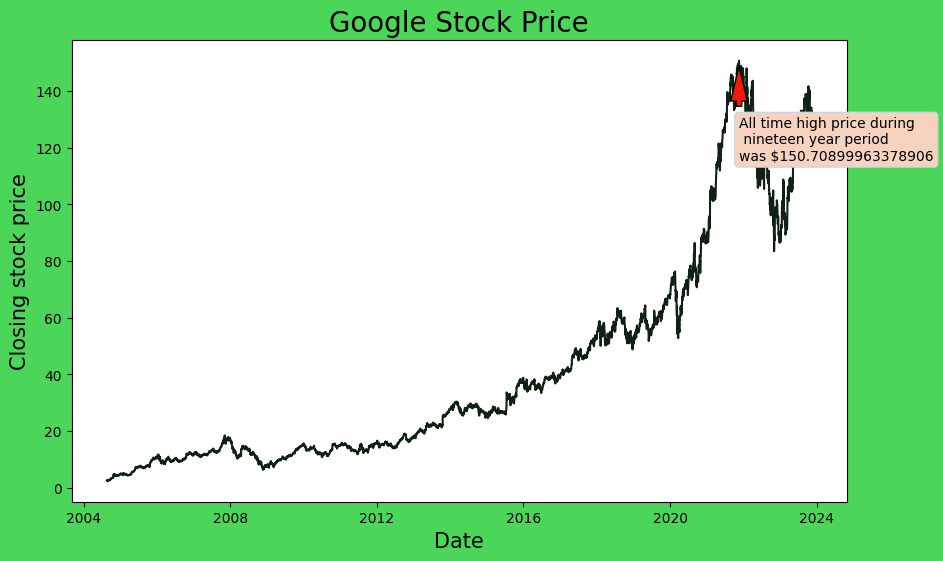

In [4]:
fix,ax=plt.subplots(figsize=(10,6),facecolor='#4bd659')
ax.plot(df['Date'],df['Close'],color='#0f2113')
high_index=df['Close'].idxmax()
high_value=df['Close'].iloc[high_index].item()
datetime=df['Date'].iloc[high_index]
ax.set_title("Google Stock Price",fontsize=20)
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Closing stock price',fontsize=15)
ax.annotate(f"All time high price during\n nineteen year period\nwas ${high_value}", xy=(datetime, high_value),xytext=(datetime,high_value-35),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))
plt.show()

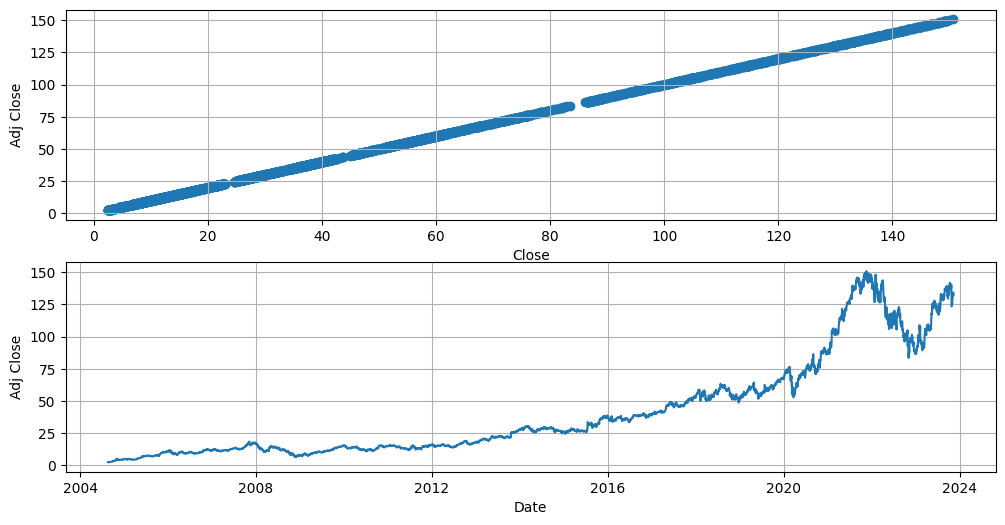

In [5]:
close_prices=df['Close']
adj_close_prices=df['Adj Close']
date_time=df['Date']
volume=df['Volume']

def drawscatterplots(dataframe,x,y,time):
    fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,6))
    ax1.scatter(dataframe[x],dataframe[y])
    ax1.set_xlabel(x)
    ax1.set_ylabel(y)
    ax1.grid(True)


    ax2.plot(date_time,dataframe[y])
    ax2.set_xlabel('Date')
    ax2.set_ylabel(y)
    ax2.grid(True)
    plt.show()
drawscatterplots(df,'Close','Adj Close',df['Date'])   
    

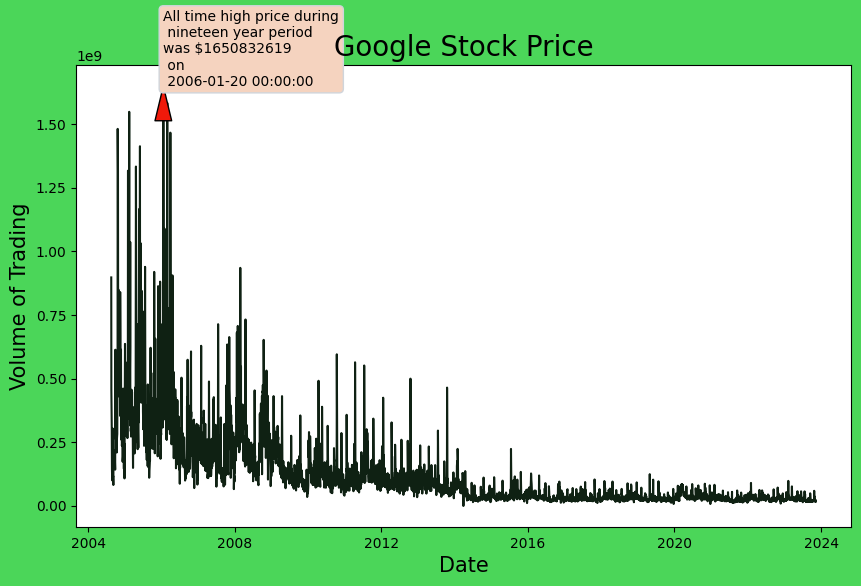

In [6]:
fix,ax=plt.subplots(figsize=(10,6),facecolor='#4bd659')
ax.plot(df['Date'],df['Volume'],color='#0f2113')
high_index=df['Volume'].idxmax()
high_value=df['Volume'].iloc[high_index].item()
datetime=df['Date'].iloc[high_index]
ax.set_title("Google Stock Price",fontsize=20)
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Volume of Trading',fontsize=15)
ax.annotate(f"All time high price during\n nineteen year period\nwas ${high_value}\n on\n {datetime}", xy=(datetime, high_value),xytext=(datetime,high_value-35),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))
plt.show()

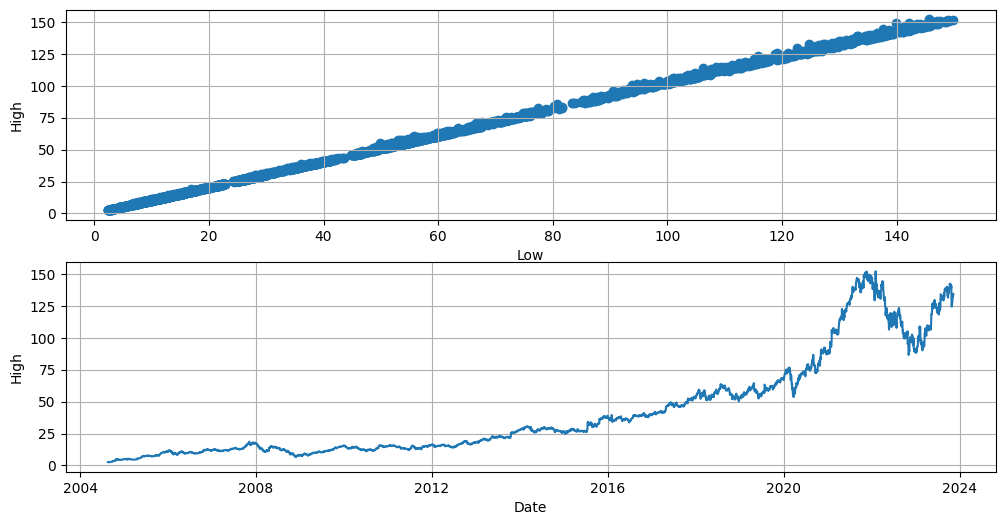

In [7]:
drawscatterplots(df,'Low','High',df['Date'])  

Adj prices and close prices are highly correlated. Open and close prices are also strongly correlated. Now we opt for the following methods for understanding correlations: 

1. Partial Correlation
2. Lagged Correlation
3. Dynamic Correlation
4. Granger Casualty Test 